In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#### Merging 12 months data into single CSV File

In [107]:
df1 = pd.read_csv('Sales_April_2019.csv')
df2= pd.read_csv('Sales_August_2019.csv')
df3 = pd.read_csv('Sales_December_2019.csv')
df4 = pd.read_csv('Sales_February_2019.csv')
df5 = pd.read_csv('Sales_January_2019.csv')
df6 = pd.read_csv('Sales_July_2019.csv')
df7 = pd.read_csv('Sales_June_2019.csv')
df8 = pd.read_csv('Sales_March_2019.csv')
df9 = pd.read_csv('Sales_May_2019.csv')
df10 = pd.read_csv('Sales_November_2019.csv')
df11 = pd.read_csv('Sales_October_2019.csv')
df12 = pd.read_csv('Sales_September_2019.csv')

In [108]:
merged_df = pd.concat([df1, df2, df3, df4, df5, df6,df7, df8, df9, df10, df11, df12], ignore_index=True)

In [109]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### EDA

In [110]:
merged_df.shape

(186850, 6)

In [111]:
merged_df.rename (columns = {'Order Date' : 'order_date'} , inplace = True)
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,order_date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [112]:
merged_df['month'] = merged_df['order_date'].str[0:2]

In [113]:
merged_df.dropna(how = 'all', inplace = True)
merged_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'order_date',
       'Purchase Address', 'month'],
      dtype='object')

In [114]:
merged_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,order_date,Purchase Address,month
count,186305,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788,13
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,12
freq,355,21903,168552,21903,355,355,24984


In [115]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   month             186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [116]:
clean_df = merged_df[merged_df['month'] != 'Or']

In [117]:
clean_df['month']= clean_df['month'].astype('int32')

C:\Users\ADITYA JHA\AppData\Local\Temp\ipykernel_16648\259037534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['month']= clean_df['month'].astype('int32')


In [118]:
clean_df[['Quantity Ordered','Price Each']] = clean_df[['Quantity Ordered','Price Each']].astype('float')

C:\Users\ADITYA JHA\AppData\Local\Temp\ipykernel_16648\719993068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[['Quantity Ordered','Price Each']] = clean_df[['Quantity Ordered','Price Each']].astype('float')


In [119]:
clean_df['sales'] = clean_df['Quantity Ordered'] * clean_df['Price Each']

C:\Users\ADITYA JHA\AppData\Local\Temp\ipykernel_16648\1989177336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['sales'] = clean_df['Quantity Ordered'] * clean_df['Price Each']


In [120]:
clean_df.head()

,Order ID,Product,Quantity Ordered,Price Each,order_date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### MONTH WITH HIGHEST SALES

In [121]:
clean_df[['month','sales']].groupby('month').sum().reset_index().max()

month         12.00
sales    4613443.34
dtype: float64

<AxesSubplot:xlabel='month', ylabel='sales'>

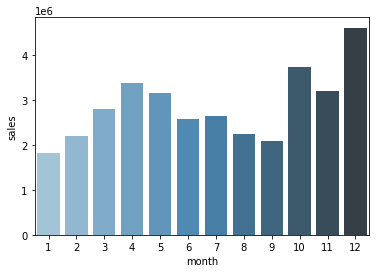

In [122]:
g1=clean_df[['month','sales']].groupby('month').sum().reset_index()
sns.barplot(x='month',
    y='sales',
    data=g1,palette='Blues_d')


#### CITY WITH HIGEST SALES

In [123]:
clean_df['Purchase Address'].head()

0            917 1st St, Dallas, TX 75001
2       682 Chestnut St, Boston, MA 02215
3    669 Spruce St, Los Angeles, CA 90001
4    669 Spruce St, Los Angeles, CA 90001
5       333 8th St, Los Angeles, CA 90001
Name: Purchase Address, dtype: object

In [124]:
clean_df['city']= clean_df['Purchase Address'].apply(lambda x : x.split(',')[1])
clean_df.head()

C:\Users\ADITYA JHA\AppData\Local\Temp\ipykernel_16648\4211520495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['city']= clean_df['Purchase Address'].apply(lambda x : x.split(',')[1])


,Order ID,Product,Quantity Ordered,Price Each,order_date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [125]:
clean_df['state']= clean_df['Purchase Address'].apply(lambda x : x.split(',')[2].split(' ')[1])
clean_df.head()

C:\Users\ADITYA JHA\AppData\Local\Temp\ipykernel_16648\1209368777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['state']= clean_df['Purchase Address'].apply(lambda x : x.split(',')[2].split(' ')[1])


,Order ID,Product,Quantity Ordered,Price Each,order_date,Purchase Address,month,sales,city,state
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [126]:
clean_df[['state','city','sales']].groupby(['state','city']).sum()

sales
state city                      
CA     Los Angeles    5452570.80
       San Francisco  8262203.91
GA     Atlanta        2795498.58
MA     Boston         3661642.01
ME     Portland        449758.27
NY     New York City  4664317.43
OR     Portland       1870732.34
TX     Austin         1819581.75
       Dallas         2767975.40
WA     Seattle        2747755.48

In [127]:
g2 = clean_df[['state','city','sales']].groupby(['state','city']).sum().reset_index()

In [128]:
g2['city'] = g2['state'] + g2['city']

<AxesSubplot:xlabel='city', ylabel='sales'>

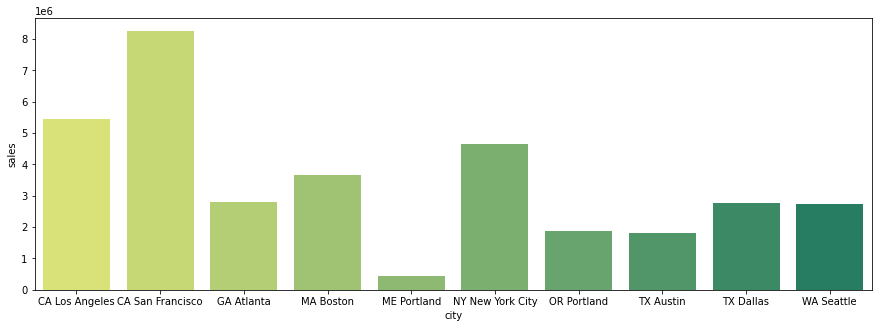

In [129]:
plt.figure(figsize=(15, 5))
sns.barplot(x='city',
    y='sales',
    data=g2,
    palette='summer_r')


#### BEST TIME FOR SHOWING ADVERTISEMENTS TO MAXIMIZE REACH AND SALES

In [130]:
clean_df['order_date'] = pd.to_datetime(clean_df['order_date'])

C:\Users\ADITYA JHA\AppData\Local\Temp\ipykernel_16648\650765310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['order_date'] = pd.to_datetime(clean_df['order_date'])


In [131]:
clean_df['hour'] = clean_df['order_date'].dt.hour
clean_df['year'] = clean_df['order_date'].dt.year
clean_df.head()

C:\Users\ADITYA JHA\AppData\Local\Temp\ipykernel_16648\3052772379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['hour'] = clean_df['order_date'].dt.hour
C:\Users\ADITYA JHA\AppData\Local\Temp\ipykernel_16648\3052772379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['year'] = clean_df['order_date'].dt.year


,Order ID,Product,Quantity Ordered,Price Each,order_date,Purchase Address,month,sales,city,state,hour,year
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,2019
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,2019
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,2019
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,2019
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,2019


In [132]:
clean_df.groupby('hour').count()['Order ID'].reset_index()

,hour,Order ID
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


<AxesSubplot:xlabel='hour', ylabel='Order ID'>

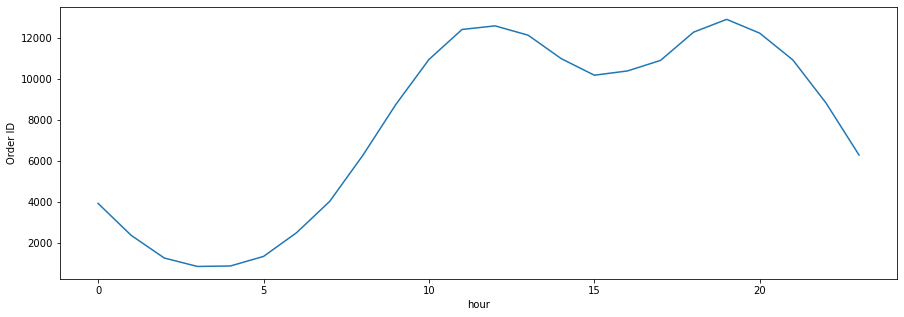

In [133]:
g3 =clean_df.groupby('hour').count()['Order ID'].reset_index()
plt.figure(figsize= (15,5))
sns.lineplot(x='hour',y='Order ID',data =g3,ci=200)

#### BEST SELLING PRODUCTS

In [134]:
bsp = clean_df.groupby('Product')['Order ID'].count()
bsp=bsp.reset_index()
bsp

,Product,Order ID
0,20in Monitor,4101
1,27in 4K Gaming Monitor,6230
2,27in FHD Monitor,7507
3,34in Ultrawide Monitor,6181
4,AA Batteries (4-pack),20577
5,AAA Batteries (4-pack),20641
6,Apple Airpods Headphones,15549
7,Bose SoundSport Headphones,13325
8,Flatscreen TV,4800
9,Google Phone,5525


<AxesSubplot:xlabel='Order ID', ylabel='Product'>

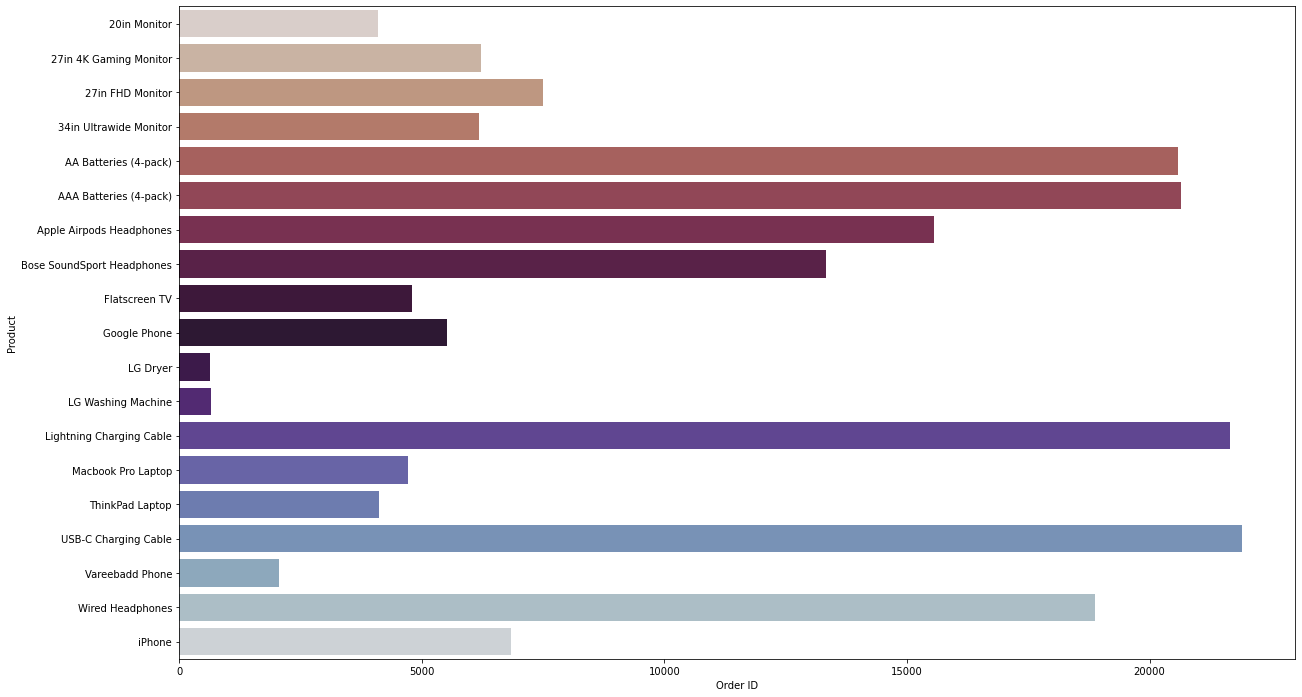

In [135]:
plt.figure(figsize =(20,12))

sns.barplot(x='Order ID',
    y='Product',
    hue=None,
    data=bsp,palette='twilight_r' )

#### PRODUCTS THAT ARE OFTEN SOLD TOGETHER

In [136]:
df = clean_df[clean_df['Order ID'].duplicated(keep= False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,order_date,Purchase Address,month,sales,city,state,hour,year
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,2019
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,2019
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19,2019
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19,2019
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,2019
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,2019
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,CA,17,2019
33,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,CA,17,2019
119,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,NY,11,2019
120,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City,NY,11,2019


In [137]:
df['grouped'] = df.groupby('Order ID')['Product'].transform( lambda x: ','.join(x))

C:\Users\ADITYA JHA\AppData\Local\Temp\ipykernel_16648\1177496033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform( lambda x: ','.join(x))


In [138]:
df = df[['Order ID','grouped']].drop_duplicates()
df.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [139]:
from itertools import combinations
from collections import Counter

In [140]:
count = Counter()
for row in df['grouped']: 
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [141]:
gd = count.most_common()
gd

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

In [142]:
gd = pd.DataFrame( gd )
gd

,0,1
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
...,...,...
308,"(AAA Batteries (4-pack), LG Dryer)",1
309,"(LG Dryer, 27in 4K Gaming Monitor)",1
310,"(LG Dryer, Lightning Charging Cable)",1
311,"(ThinkPad Laptop, LG Dryer)",1


#### RECOMMEND PRODUCTS

In [143]:
gd[0]= gd[0].astype('str')
gd[['object1','object2']]= gd[0].str.strip('()').str.split(',', expand=True)
gd['freq']=gd[1]

In [144]:
gd = gd[['object1','object2','freq']]
gd.head()

,object1,object2,freq
0,'iPhone','Lightning Charging Cable',1005
1,'Google Phone','USB-C Charging Cable',987
2,'iPhone','Wired Headphones',447
3,'Google Phone','Wired Headphones',414
4,'Vareebadd Phone','USB-C Charging Cable',361


In [145]:
rd=gd.groupby(['object1','object2','freq']).count().sort_values(by=['object1','freq'],ascending= False)

In [146]:
rd

Empty DataFrame
Columns: []
Index: [('iPhone',  'Lightning Charging Cable', 1005), ('iPhone',  'Wired Headphones', 447), ('iPhone',  'Apple Airpods Headphones', 360), ('iPhone',  'AAA Batteries (4-pack)', 17), ('iPhone',  'USB-C Charging Cable', 15), ('iPhone',  'AA Batteries (4-pack)', 14), ('iPhone',  '27in 4K Gaming Monitor', 6), ('iPhone',  '34in Ultrawide Monitor', 6), ('iPhone',  'Flatscreen TV', 6), ('iPhone',  'Bose SoundSport Headphones', 5), ('iPhone',  'ThinkPad Laptop', 4), ('iPhone',  'Vareebadd Phone', 4), ('iPhone',  'Google Phone', 3), ('iPhone',  'Macbook Pro Laptop', 3), ('iPhone',  '20in Monitor', 2), ('iPhone',  'iPhone', 2), ('iPhone',  '27in FHD Monitor', 1), ('iPhone',  'LG Washing Machine', 1), ('Wired Headphones',  'USB-C Charging Cable', 45), ('Wired Headphones',  'AAA Batteries (4-pack)', 43), ('Wired Headphones',  'AA Batteries (4-pack)', 39), ('Wired Headphones',  'Lightning Charging Cable', 37), ('Wired Headphones',  'Wired Headphones', 35), ('Wired Headphones',  'Apple Airpods Headphones', 31), ('Wired Headphones',  'Bose SoundSport Headphones', 21), ('Wired Headphones',  '27in 4K Gaming Monitor', 18), ('Wired Headphones',  '34in Ultrawide Monitor', 17), ('Wired Headphones',  'iPhone', 15), ('Wired Headphones',  'Macbook Pro Laptop', 13), ('Wired Headphones',  '27in FHD Monitor', 12), ('Wired Headphones',  'ThinkPad Laptop', 10), ('Wired Headphones',  'Google Phone', 9), ('Wired Headphones',  '20in Monitor', 7), ('Wired Headphones',  'Flatscreen TV', 7), ('Wired Headphones',  'Vareebadd Phone', 6), ('Wired Headphones',  'LG Washing Machine', 3), ('Vareebadd Phone',  'USB-C Charging Cable', 361), ('Vareebadd Phone',  'Wired Headphones', 143), ('Vareebadd Phone',  'Bose SoundSport Headphones', 80), ('Vareebadd Phone',  'AA Batteries (4-pack)', 9), ('Vareebadd Phone',  'Apple Airpods Headphones', 6), ('Vareebadd Phone',  '34in Ultrawide Monitor', 4), ('Vareebadd Phone',  'Google Phone', 4), ('Vareebadd Phone',  'Flatscreen TV', 3), ('Vareebadd Phone',  'iPhone', 3), ('Vareebadd Phone',  '27in 4K Gaming Monitor', 2), ('Vareebadd Phone',  'AAA Batteries (4-pack)', 2), ('Vareebadd Phone',  'ThinkPad Laptop', 2), ('Vareebadd Phone',  '27in FHD Monitor', 1), ('Vareebadd Phone',  'Lightning Charging Cable', 1), ('USB-C Charging Cable',  'Wired Headphones', 160), ('USB-C Charging Cable',  'Bose SoundSport Headphones', 77), ('USB-C Charging Cable',  'USB-C Charging Cable', 48), ('USB-C Charging Cable',  'AAA Batteries (4-pack)', 45), ('USB-C Charging Cable',  'Lightning Charging Cable', 42), ('USB-C Charging Cable',  'AA Batteries (4-pack)', 38), ('USB-C Charging Cable',  'Apple Airpods Headphones', 34), ('USB-C Charging Cable',  '27in FHD Monitor', 31), ('USB-C Charging Cable',  'iPhone', 14), ('USB-C Charging Cable',  'Google Phone', 12), ('USB-C Charging Cable',  '27in 4K Gaming Monitor', 11), ('USB-C Charging Cable',  '34in Ultrawide Monitor', 11), ('USB-C Charging Cable',  'ThinkPad Laptop', 11), ('USB-C Charging Cable',  '20in Monitor', 10), ('USB-C Charging Cable',  'Flatscreen TV', 10), ('USB-C Charging Cable',  'Macbook Pro Laptop', 9), ('USB-C Charging Cable',  'Vareebadd Phone', 7), ('USB-C Charging Cable',  'LG Dryer', 1), ('ThinkPad Laptop',  'AAA Batteries (4-pack)', 16), ('ThinkPad Laptop',  'Lightning Charging Cable', 11), ('ThinkPad Laptop',  'Bose SoundSport Headphones', 9), ('ThinkPad Laptop',  'USB-C Charging Cable', 9), ('ThinkPad Laptop',  'AA Batteries (4-pack)', 8), ('ThinkPad Laptop',  'Apple Airpods Headphones', 7), ('ThinkPad Laptop',  'Flatscreen TV', 4), ('ThinkPad Laptop',  'Wired Headphones', 4), ('ThinkPad Laptop',  'Google Phone', 3), ('ThinkPad Laptop',  'iPhone', 3), ('ThinkPad Laptop',  '27in FHD Monitor', 2), ('ThinkPad Laptop',  'Macbook Pro Laptop', 2), ('ThinkPad Laptop',  'ThinkPad Laptop', 2), ('ThinkPad Laptop',  '27in 4K Gaming Monitor', 1), ('ThinkPad Laptop',  '34in Ultrawide Monitor', 1), ('ThinkPad Laptop',  'LG Dryer', 1), ('ThinkPad Laptop',  'Vareebadd Phon

In [147]:
t1 = rd.apply(lambda group: group.nlargest(5, columns='')).reset_index()

In [148]:
t1.head(30)

,object1,object2,freq
0,'iPhone','Lightning Charging Cable',1005
1,'iPhone','Wired Headphones',447
2,'iPhone','Apple Airpods Headphones',360
3,'iPhone','AAA Batteries (4-pack)',17
4,'iPhone','USB-C Charging Cable',15
5,'iPhone','AA Batteries (4-pack)',14
6,'iPhone','27in 4K Gaming Monitor',6
7,'iPhone','34in Ultrawide Monitor',6
8,'iPhone','Flatscreen TV',6
9,'iPhone','Bose SoundSport Headphones',5


In [149]:
sp = t1.sort_values(by='freq', ascending=False)
sp

,object1,object2,freq
0,'iPhone','Lightning Charging Cable',1005
140,'Google Phone','USB-C Charging Cable',987
1,'iPhone','Wired Headphones',447
141,'Google Phone','Wired Headphones',414
36,'Vareebadd Phone','USB-C Charging Cable',361
...,...,...,...
136,'LG Dryer','Google Phone',1
135,'LG Dryer','Flatscreen TV',1
134,'LG Dryer','AAA Batteries (4-pack)',1
133,'LG Dryer','27in FHD Monitor',1


In [150]:
mfp = sp.groupby('object1').first()

In [151]:
mfp.sort_values(by='freq',ascending = False).reset_index()
mfp = mfp.drop(columns = 'freq')


In [152]:
mfp=mfp.reset_index()
mfp

,object1,object2
0,'20in Monitor','USB-C Charging Cable'
1,'27in 4K Gaming Monitor','Lightning Charging Cable'
2,'27in FHD Monitor','AAA Batteries (4-pack)'
3,'34in Ultrawide Monitor','AA Batteries (4-pack)'
4,'AA Batteries (4-pack)','Lightning Charging Cable'
5,'AAA Batteries (4-pack)','USB-C Charging Cable'
6,'Apple Airpods Headphones','Wired Headphones'
7,'Bose SoundSport Headphones','Wired Headphones'
8,'Flatscreen TV','AAA Batteries (4-pack)'
9,'Google Phone','USB-C Charging Cable'
